In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
#forming a panda dataframe from the metadata file

file_handler = open("UrbanSound8K.csv", "r")
data = pd.read_csv(file_handler, sep = ',')
file_handler.close()


In [3]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [5]:
from librosa import display
import librosa

In [6]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40)

chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=438
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=219
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=110
  warnings.warn(


((40, 14), (40, 14), (40, 14), (40, 14), (40, 14))

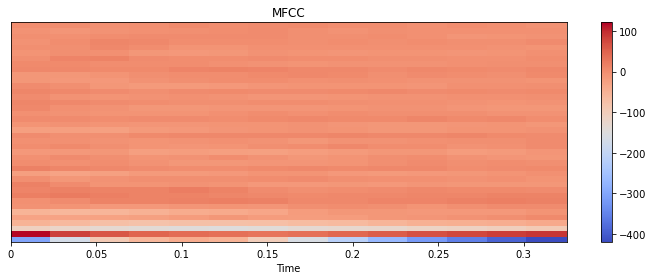

In [7]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

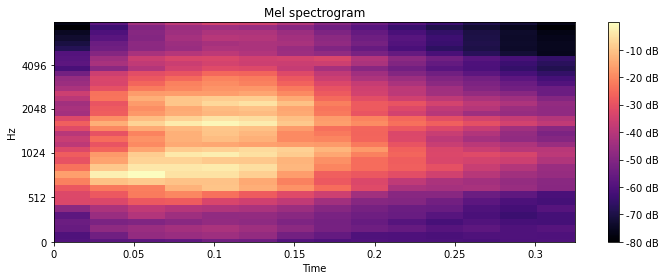

In [8]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

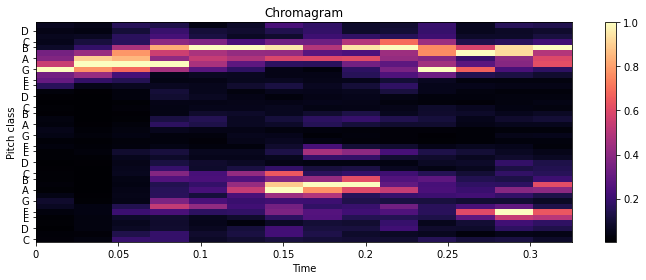

In [9]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

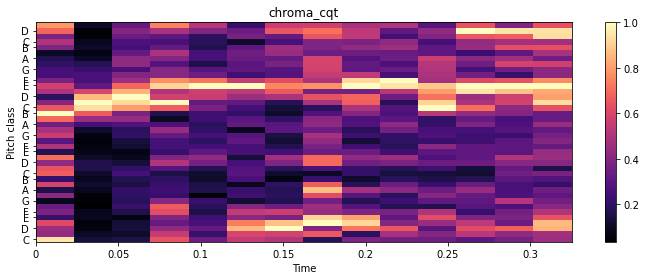

In [10]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

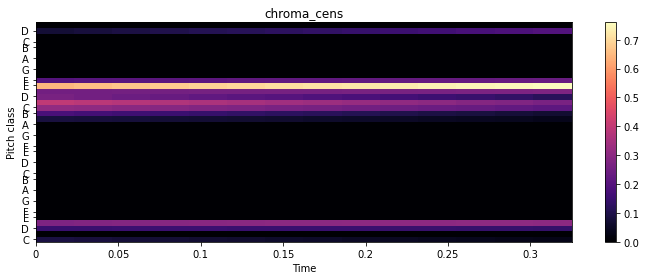

In [11]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [15]:
#feature set
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((40,), (40,), (40,), (40,), (40,))

In [16]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

(40, 5)

In [19]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,bins_per_octave=40,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|                                                                                         | 0/8732 [00:00<?, ?it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=438
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=219
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=110
  warnings.warn(
  0%|                                                                               | 9/8732 [00:07<2:00:11,  1.21it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_ff

  9%|██████▋                                                                      | 761/8732 [12:35<1:47:23,  1.24it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=827
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=414
  warnings.warn(
  9%|███████                                                                      | 799/8732 [13:09<1:57:33,  1.12it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=703
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=352
  warnings.warn(
  9%|███████▏                                                                     | 814/8732 [13:2

 13%|██████████▏                                                                 | 1172/8732 [18:29<1:32:24,  1.36it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=799
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=400
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=200
  warnings.warn(
 13%|██████████▏                                                                 | 1173/8732 [18:30<1:25:14,  1.48it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=717
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_ff

 16%|████████████▌                                                               | 1439/8732 [23:16<1:39:08,  1.23it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=589
  warnings.warn(
 17%|████████████▋                                                               | 1453/8732 [23:33<2:26:03,  1.20s/it]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=755
  warnings.warn(
 17%|████████████▋                                                               | 1454/8732 [23:34<2:09:00,  1.06s/it]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=778
  warnings.warn(
 17%|████████████▋                                                               | 1455/8732 [23:36<2:30:15,  1.24s/it]C:\Users\Kanishk Yadav\ana

 17%|█████████████▏                                                              | 1518/8732 [24:42<2:37:56,  1.31s/it]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=675
  warnings.warn(
 17%|█████████████▏                                                              | 1519/8732 [24:42<2:13:11,  1.11s/it]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=814
  warnings.warn(
 17%|█████████████▏                                                              | 1520/8732 [24:44<2:36:42,  1.30s/it]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=665
  warnings.warn(
 17%|█████████████▏                                                              | 1521/8732 [24:45<2:14:03,  1.12s/it]C:\Users\Kanishk Yadav\ana

 21%|████████████████▏                                                             | 1809/8732 [31:23<59:07,  1.95it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=749
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=375
  warnings.warn(
 21%|████████████████▏                                                             | 1810/8732 [31:24<58:59,  1.96it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=798
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=399
  warnings.warn(
 21%|████████████████▏                                                             | 1811/8732 [31

 25%|██████████████████▋                                                         | 2148/8732 [34:21<1:04:46,  1.69it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=775
  warnings.warn(
 25%|███████████████████▏                                                          | 2149/8732 [34:22<58:16,  1.88it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=967
  warnings.warn(
 25%|███████████████████▏                                                        | 2208/8732 [34:54<1:03:00,  1.73it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=138
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

 28%|█████████████████████▌                                                        | 2411/8732 [36:49<57:09,  1.84it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=865
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=433
  warnings.warn(
 28%|█████████████████████▌                                                        | 2413/8732 [36:50<54:30,  1.93it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=385
  warnings.warn(
 28%|█████████████████████▌                                                        | 2414/8732 [36:51<49:29,  2.13it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=223
  warnings.warn(
 34%|██████████████████████████▋                                                   | 2991/8732 [42:27<33:31,  2.85it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=149
  warnings.warn(
 34%|██████████████████████████▋                                                   | 2993/8732 [42:28<29:56,  3.20it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=741
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=186
  warnings.warn(
 34%|██████████████████████████▊                                                   | 2998/8732 [42

 40%|███████████████████████████████▎                                              | 3509/8732 [47:23<58:04,  1.50it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=969
  warnings.warn(
 41%|███████████████████████████████▊                                              | 3555/8732 [47:50<49:24,  1.75it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=21
  warnings.warn(
 41%|███████████████████████████████▏                                            | 3590/8732 [48:12<1:07:45,  1.26it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

 48%|█████████████████████████████████████                                         | 4155/8732 [53:58<30:44,  2.48it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=521
  warnings.warn(
 48%|█████████████████████████████████████▏                                        | 4158/8732 [53:59<30:27,  2.50it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=670
  warnings.warn(
 48%|█████████████████████████████████████▏                                        | 4159/8732 [53:59<29:20,  2.60it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=986
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

 53%|█████████████████████████████████████████▎                                    | 4622/8732 [58:51<37:30,  1.83it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=887
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=444
  warnings.warn(
 53%|█████████████████████████████████████████▍                                    | 4644/8732 [59:04<41:39,  1.64it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=990
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=495
  warnings.warn(
 54%|█████████████████████████████████████████▉                                    | 4688/8732 [59

 59%|█████████████████████████████████████████████                               | 5178/8732 [1:05:05<36:53,  1.61it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=789
  warnings.warn(
 60%|█████████████████████████████████████████████▌                              | 5236/8732 [1:05:44<35:51,  1.62it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=943
  warnings.warn(
 60%|█████████████████████████████████████████████▊                              | 5260/8732 [1:05:59<33:55,  1.71it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=651
  warnings.warn(
 60%|█████████████████████████████████████████████▊                              | 5261/8732 [1:06:00<32:18,  1.79it/s]C:\Users\Kanishk Yadav\ana

 67%|███████████████████████████████████████████████████                         | 5870/8732 [1:11:50<16:33,  2.88it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=713
  warnings.warn(
 67%|███████████████████████████████████████████████████                         | 5873/8732 [1:11:52<19:37,  2.43it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=930
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=465
  warnings.warn(
 67%|███████████████████████████████████████████████████▏                        | 5875/8732 [1:11:52<18:17,  2.60it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

 74%|████████████████████████████████████████████████████████▎                   | 6468/8732 [1:16:46<12:39,  2.98it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=988
  warnings.warn(
 74%|████████████████████████████████████████████████████████▎                   | 6469/8732 [1:16:46<13:05,  2.88it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=148
  warnings.warn(
 74%|████████████████████████████████████████████████████████▎                   | 6476/8732 [1:16:49<14:20,  2.62it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=117
  warnings.warn(
 74%|████████████████████████████████████████████████████████▌                   | 6494/8732 [1:16:58<16:43,  2.23it/s]C:\Users\Kanishk Yadav\ana

 84%|████████████████████████████████████████████████████████████████▏           | 7377/8732 [1:25:26<10:10,  2.22it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=942
  warnings.warn(
C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=471
  warnings.warn(
 84%|████████████████████████████████████████████████████████████████▏           | 7378/8732 [1:25:26<09:36,  2.35it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=609
  warnings.warn(
 85%|████████████████████████████████████████████████████████████████▍           | 7399/8732 [1:25:34<09:16,  2.40it/s]C:\Users\Kanishk Yadav\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=

In [20]:
len(x_train)+len(x_test)

8732

In [21]:
len(data)

8732

In [22]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 40, 5), (837, 40, 5), (7895,), (837,))

In [23]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 200), (837, 200))

In [24]:
#saving the data numpy arrays
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")